# Using MAPE loss function and Powel method builded custom polynomial regression functiion using pipiline(polynomial features - custom linear rergession) 
# Polynom degree choose by cross validation 

In [68]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
plt.rcParams['figure.figsize'] = [10,8]

## Get data

In [79]:
# Generate nonlinear data with outliers.
# Don't hesitate to change the generation parameters, method and data itself! Observe, how it changes results
from sklearn.datasets import make_classification
n_samples = 1000
n_outliers = 100

X, y= make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state =42)

In [80]:
print(X.shape, y.shape)

(1000, 2) (1000,)


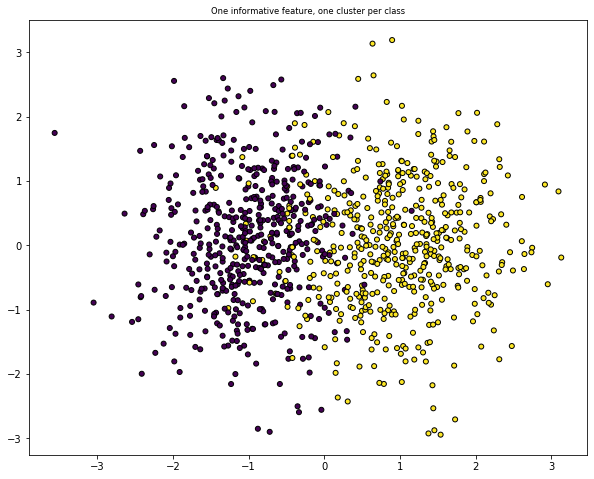

In [81]:
plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


In [138]:
# Replace first N samples with outliers

# X[:n_outliers] = np.random.randint(-4, high=4,size=(n_outliers, 1))
# y[:n_outliers] = np.random.randint(2,size=n_outliers)

In [168]:
# Replace first N samples with outliers

X[:n_outliers] =8 * np.random.random_sample((100, 2)) - 4
y[:n_outliers] = np.random.randint(2,size=n_outliers)

In [169]:
print(y[:n_outliers])

[0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]


In [170]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [171]:
# Scale data to put in range [0,1] for stability.
# Check results if ignore it.
# See also sklearn User Guide (https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) and try another tools (Standartization, Normalization)
# X = (X - X.min())/(X.max()-X.min())
# y = (y - y.min())/(y.max()-y.min())

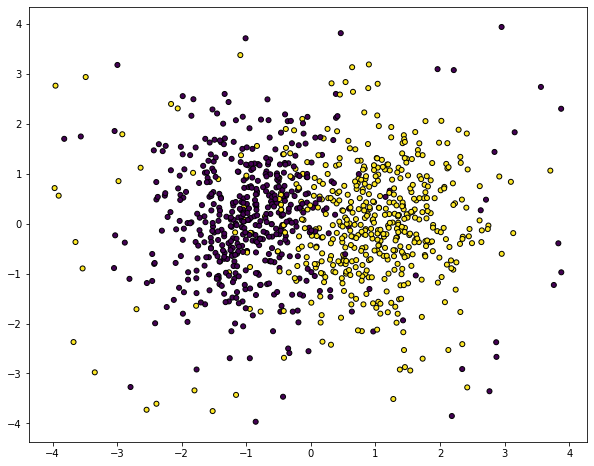

In [173]:
#visualize data
# plt.plot(X, y, 'o', label = 'Data')
# plt.legend()
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [174]:
# Add bias column to data
X_I = np.c_[np.ones_like(X), X]

In [175]:
print(X_I)

[[ 1.          1.          0.38944418  2.1235819 ]
 [ 1.          1.          2.76510546 -3.35644954]
 [ 1.          1.          2.95288853  3.94406683]
 ...
 [ 1.          1.          1.41351134  1.41093238]
 [ 1.          1.         -0.98236735  0.21743287]
 [ 1.          1.          1.44610966  0.09798315]]


# Loss function 

In [176]:
from sklearn.metrics import log_loss
#log_loss(y_true, y_pred)

### Define predict model
Prediction function $h(\theta|X) = \theta^Tx$:

In [177]:
def predict(X, theta):
    return np.dot(X, theta)

In [178]:
def sigmoid_wrap(predict_func):
    return 1/(1+np.exp(-predict_func))

In [179]:
# def computeCost(X, y, theta):
#     return sum((y-sigmoid_wrap(predict(X, theta))**2) / (2*len(X)))

In [205]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
    #     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    m = len(X)
    history = [] # list of theta values on each iteration 
    cost = [] # list of cost function values on each iteration
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        theta = theta + alpha * (np.sum((y - sigmoid_wrap(np.dot(X, theta.T))) * X.T, axis = 1))
        
    return theta, np.array(cost), np.array(history)

In [206]:
random_model_loss=log_loss(y, predict(X_I, theta = np.random.random(len(X_I[0]))))

In [207]:
print('Error of random model:', random_model_loss)

Error of random model: 8.43196703763102


Initialize learning

In [266]:
alpha = 0.00001
iters = 100000

Learn model

In [267]:
w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization

In [268]:
y_pred= sigmoid_wrap(predict(X,w)).round()

In [269]:
print('Model`s cost:', log_loss(y, y_pred))
print('Calculated weights: ', w)

Model`s cost: 4.766395919953766
Calculated weights:  [ 1.3719264  -0.11247104]


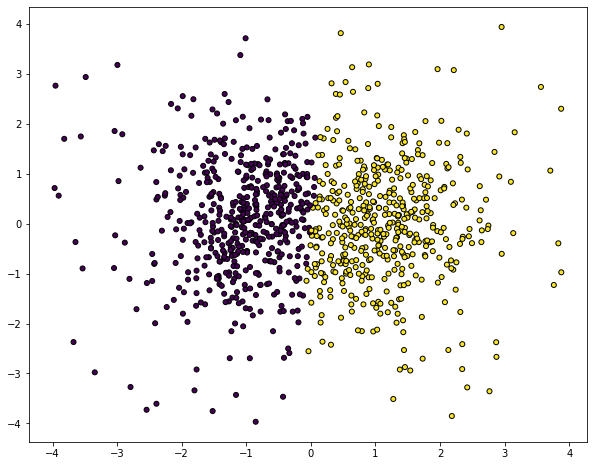

In [270]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y_pred,
            s=25, edgecolor='k')

In [271]:
print(y_pred.shape)

(1000,)


In [278]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
print(cm)

[[443  56]
 [ 82 419]]


In [283]:
import pandas as pd
pd.DataFrame([['Predicted:',cm[0][0],cm[1][0]],
                    ['',cm[0][1],cm[1][1]]],
             columns=['Logistic Regression','Actual:', ''], ).T

,0,1
Logistic Regression,Predicted:,
Actual0:,443,56
,82,419


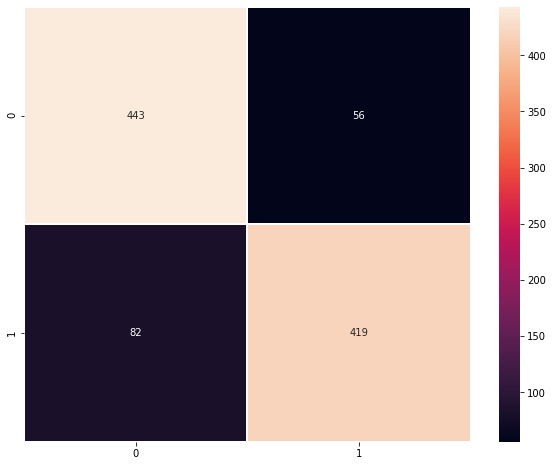

In [289]:
import seaborn as sns
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

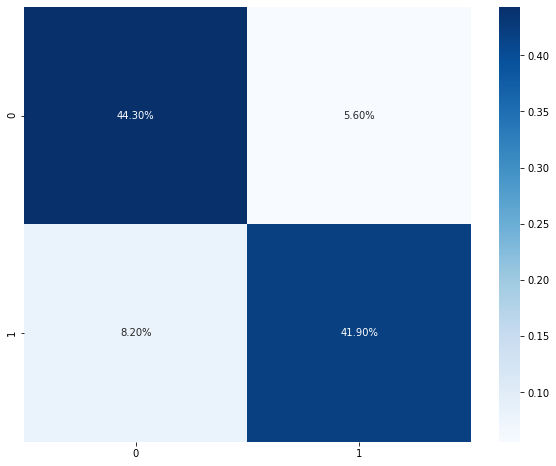

In [288]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn import metrics

In [274]:
def get_metrics(true_labels, predicted_labels):
    return np.round(metrics.accuracy_score(true_labels,predicted_labels),4), np.round(metrics.precision_score(true_labels,predicted_labels,average='weighted'),4), np.round(metrics.recall_score(true_labels,predicted_labels,average='weighted'),4),np.round(metrics.f1_score(true_labels,predicted_labels,average='weighted'),4)

In [275]:
rate = get_metrics(true_labels=y, predicted_labels=y_pred)

In [276]:
print(rate)
pd.DataFrame([['Custom Logistic Regression', rate[0], rate[1],
               rate[2], rate[3]]],
             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],).T

(0.862, 0.863, 0.862, 0.8619)


,0
Model,Custom Logistic Regression
Accuracy,0.862
Precision,0.863
Recall,0.862
F1 Score,0.8619
